In [8]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv('lab1.csv')

In [10]:
data

,sky,air-temp,humidity,wind,water,forecast,enjoy sport
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,cold,high,strong,warm,change,no
3,sunny,warm,high,strong,cool,change,yes


In [11]:
concepts=np.array(data)[:,:-1]

In [12]:
concepts

array([['sunny', 'warm', 'normal', 'strong', 'warm', 'same'],
       ['sunny', 'warm', 'high', 'strong', 'warm', 'same'],
       ['rainy', 'cold', 'high', 'strong', 'warm', 'change'],
       ['sunny', 'warm', 'high', 'strong', 'cool', 'change']],
      dtype=object)

In [14]:
target=np.array(data)[:,-1]

In [15]:
target

array(['yes', 'yes', 'no', 'yes'], dtype=object)

In [19]:
def train(con,tar):
    for i,val in enumerate(tar):
        if val=="yes":
            specific_h=con[i].copy()
            break
            
    for i,val in enumerate(con):
        if tar[i]=="yes":
            for x in range(len(specific_h)):
                if val[x]!=specific_h[x]:
                     specific_h[x]='?'
                else:
                     pass
    return specific_h

In [20]:
print(train(concepts,target))

['sunny' 'warm' '?' 'strong' '?' '?']


In [29]:
data=pd.read_csv('lab2.csv')

In [30]:
data

,citations,size,inLibrary,price,editions,buy
0,some,small,no,affordable,many,no
1,many,big,no,expensive,one,yes
2,some,big,always,expensive,few,no
3,many,medium,no,expensive,many,yes
4,many,small,no,affordable,many,yes


In [31]:
concepts=np.array(data)[:,:-1]

In [32]:
concepts

array([['some', 'small', 'no', 'affordable', 'many'],
       ['many', 'big', 'no', 'expensive', 'one'],
       ['some', 'big', 'always', 'expensive', 'few'],
       ['many', 'medium', 'no', 'expensive', 'many'],
       ['many', 'small', 'no', 'affordable', 'many']], dtype=object)

In [33]:
target=np.array(data)[:,-1]

In [34]:
target

array(['no', 'yes', 'no', 'yes', 'yes'], dtype=object)

In [35]:
def train(con,tar):
    for i,val in enumerate(tar):
        if val=="yes":
            specific_h=con[i].copy()
            break
            
    for i,val in enumerate(con):
        if tar[i]=="yes":
            for x in range(len(specific_h)):
                if val[x]!=specific_h[x]:
                     specific_h[x]='?'
                else:
                     pass
    return specific_h

In [36]:
print(train(concepts,target))

['many' '?' 'no' '?' '?']


In [ ]:
 lab 2(Candidate elimination)

In [25]:
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Initialization of specific_h and genearal_h

Specific Boundary:  ['some' 'small' 'no' 'affordable' 'many']

Generic Boundary:  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]

Instance 1 is  ['some' 'small' 'no' 'affordable' 'many']
Instance is Negative 
Specific Bundary after  1 Instance is  ['some' 'small' 'no' 'affordable' 'many']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]



Instance 2 is  ['many' 'big' 'no' 'expensive' 'one']
Instance is Positive 
Specific Bundary after  2 Instance is  ['?' '?' 'no' '?' '?']
Generic Boundary after  2 Instance is  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]



Instance 3 is  ['some' 'big' 'always' 'expensive' 'few']
Instance is Negative 
Spe

In [ ]:
lab 3 (ID3)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

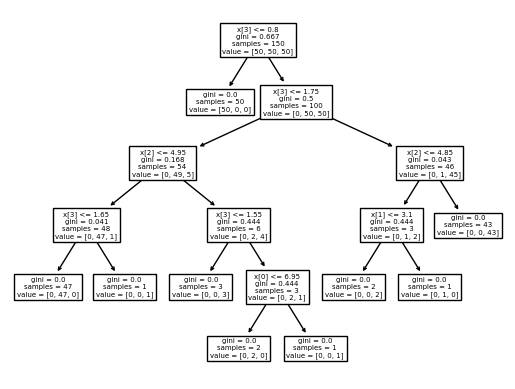

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf.fit(X, y)

plot_tree(clf)

In [ ]:
lab 4(SVM)

Accuracy: 1.0


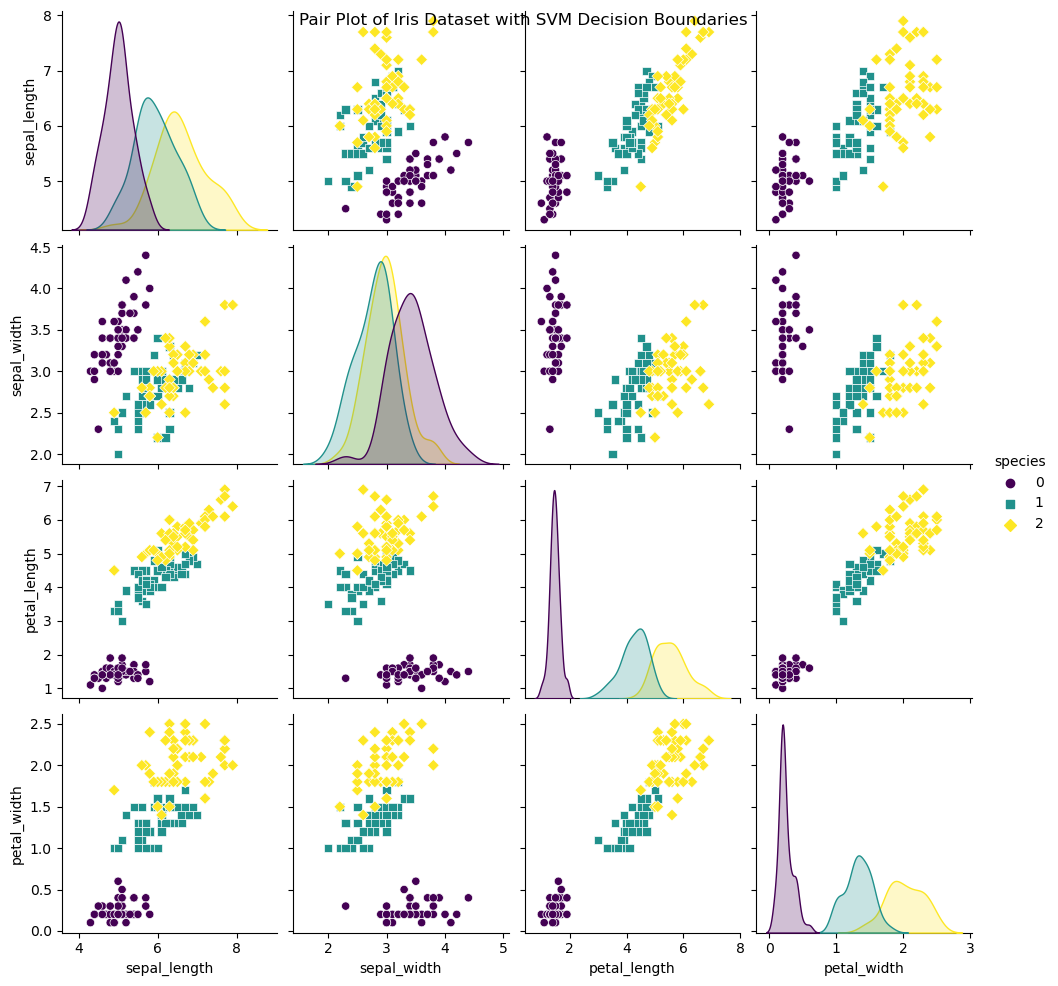

In [31]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

iris_df = sns.load_dataset('iris')
iris_df['species'] = iris_df['species'].astype('category').cat.codes

# Pair plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset with SVM Decision Boundaries')
plt.show()


In [ ]:
lab 5(KNN)

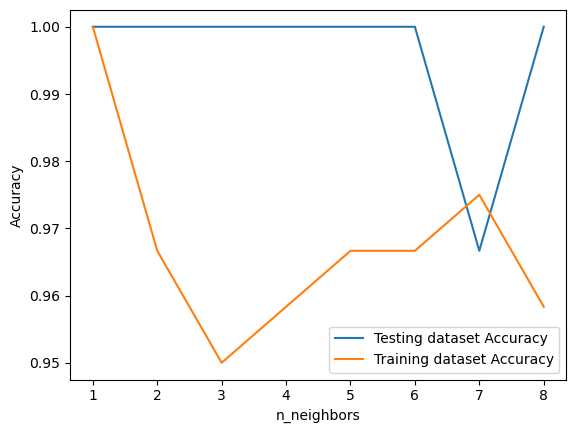

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()
X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
lab 6(EM algorithm)

In [33]:
import numpy as np
from scipy.stats import multivariate_normal

def initialize_parameters(k, data):
    np.random.seed(42)
    n, d = data.shape
    means = data[np.random.choice(n, k, replace=False)]
    covariances = [np.eye(d) for _ in range(k)]
    weights = np.ones(k) / k
    return means, covariances, weights

def calculate_likelihood(data, means, covariances, weights):
    k = len(means)
    likelihood = np.zeros((len(data), k))
    
    for i in range(k):
        likelihood[:, i] = multivariate_normal.pdf(data, means[i], covariances[i])
    
    return likelihood

def expectation_step(data, means, covariances, weights):
    likelihood = calculate_likelihood(data, means, covariances, weights)
    responsibilities = likelihood * weights
    responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
    return responsibilities

def maximization_step(data, responsibilities):
    Nk = np.sum(responsibilities, axis=0)
    means = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]
    
    covariances = []
    for k in range(len(Nk)):
        diff = data - means[k]
        cov_k = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
        covariances.append(cov_k)
    
    covariances = np.array(covariances)
    
    weights = Nk / len(data)
    
    return means, covariances, weights

def em_algorithm(data, k, max_iter=100, tol=1e-4):
    means, covariances, weights = initialize_parameters(k, data)
    
    for _ in range(max_iter):
        
        responsibilities = expectation_step(data, means, covariances, weights)
        
        
        new_means, new_covariances, new_weights = maximization_step(data, responsibilities)
        
       
        if np.linalg.norm(new_means - means) < tol and np.linalg.norm(new_covariances - covariances) < tol and np.linalg.norm(new_weights - weights) < tol:
            break
        
        means, covariances, weights = new_means, new_covariances, new_weights
    
    return means, covariances, weights


if __name__ == "__main__":
    
    np.random.seed(42)
    data1 = np.random.multivariate_normal([3, 3], [[1, 0.5], [0.5, 1]], 100)
    data2 = np.random.multivariate_normal([8, 8], [[1, -0.5], [-0.5, 1]], 100)
    data = np.concatenate([data1, data2])

    
    k = 2
    means, covariances, weights = em_algorithm(data, k)

    print("Means:")
    print(means)
    print("\nCovariances:")
    print(covariances)
    print("\nWeights:")
    print(weights)


Means:
[[3.08307108 3.11709339]
 [7.91067722 8.13281057]]

Covariances:
[[[ 0.81509575  0.29752212]
  [ 0.29752212  0.76768986]]

 [[ 1.08836658 -0.5861711 ]
  [-0.5861711   0.94906901]]]

Weights:
[0.50000007 0.49999993]


In [ ]:
lab 7(Naive Bayers)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data  
y = iris.target  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


naive_bayes_classifier = GaussianNB()


naive_bayes_classifier.fit(X_train, y_train)


y_pred = naive_bayes_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
lab 8(K Means)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


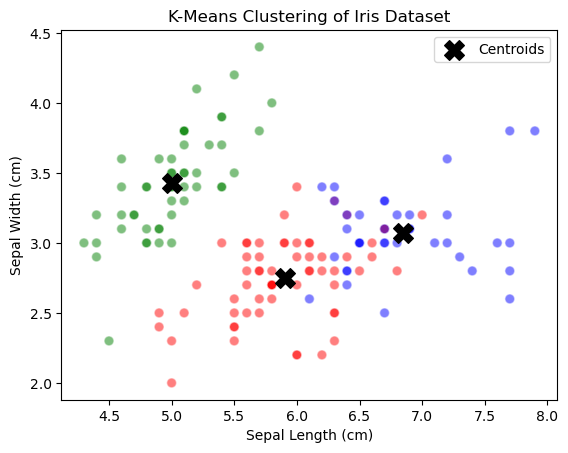

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data  


kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(X)


labels = kmeans.labels_
centroids = kmeans.cluster_centers_


colors = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=colors[labels], s=50, alpha=0.5, edgecolors='w')


plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


In [ ]:
lab 9(Apriori)

In [36]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 660.6 kB/s eta 0:00:03
                                              0.0/1.4 MB 660.6 kB/s eta 0:00:03
     -                                        0.0/1.4 MB 219.4 kB/s eta 0:00:07
     --                                       0.1/1.4 MB 353.1 kB/s eta 0:00:04
     ---                                      0.1/1.4 MB 467.6 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 467.6 kB/s eta 0:00:03
     ----                                     0.2/1.4 MB 476.3 kB/s eta 0:00:03
     ------                                   0.2/1.4 MB 573.4 kB/s eta 0:00:03
     ------                                   0.2/1.4 MB 580.1 kB/s eta 0:00:03
     -------                                  0.3/1.4 MB 550.1 kB/s eta 0:00:03
     ---------                                0.3/1.4 MB 6

In [37]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


transactions = [
    ['bread', 'milk', 'beer'],
    ['bread', 'diapers', 'eggs', 'milk'],
    ['milk', 'diapers', 'beer', 'cola'],
    ['bread', 'milk', 'diapers', 'beer'],
    ['bread', 'cola', 'diapers'],
]


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


print("Frequent Itemsets:")
print(frequent_itemsets)


print("\nAssociation Rules:")
print(rules)



Frequent Itemsets:
    support                itemsets
0       0.6                  (beer)
1       0.8                 (bread)
2       0.4                  (cola)
3       0.8               (diapers)
4       0.8                  (milk)
5       0.4           (bread, beer)
6       0.4         (diapers, beer)
7       0.6            (milk, beer)
8       0.6        (diapers, bread)
9       0.6           (milk, bread)
10      0.4         (diapers, cola)
11      0.6         (diapers, milk)
12      0.4     (milk, bread, beer)
13      0.4   (diapers, milk, beer)
14      0.4  (diapers, milk, bread)

Association Rules:
        antecedents consequents  antecedent support  consequent support  \
0            (milk)      (beer)                 0.8                 0.6   
1            (beer)      (milk)                 0.6                 0.8   
2         (diapers)     (bread)                 0.8                 0.8   
3           (bread)   (diapers)                 0.8                 0.8   
4         

In [ ]:
lab 10(PCA)

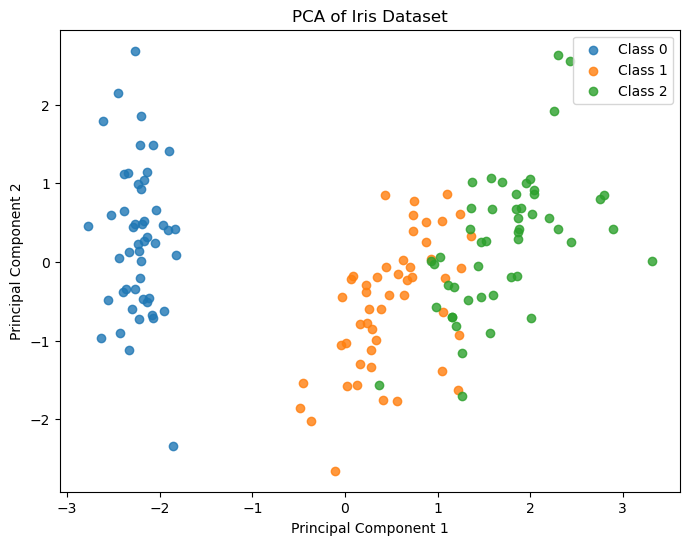

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target


mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev


pca = PCA(n_components=2)


X_pca = pca.fit_transform(X_standardized)


plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}', alpha=0.8)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
